In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import sklearn

In [2]:
df = pd.read_csv('fifa_modified1.csv')
df.drop(columns=['sofifa_id','nationality','club','player_positions',
                         'preferred_foot','work_rate','body_type','real_face'],inplace=True)
    
names = df.short_name.tolist()
df.drop(columns=['short_name'],inplace=True)

In [3]:
x= df.values
scaler = preprocessing.MinMaxScaler()    
x_scaled = scaler.fit_transform(x)
X_norm= pd.DataFrame(x_scaled)

In [5]:
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

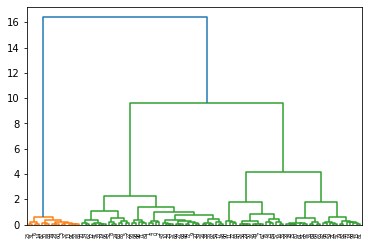

In [16]:
dendrogram = sch.dendrogram(sch.linkage(reduced.iloc[:100],method='ward'))
# we c

In [17]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(reduced)
clustering_model.labels_

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Labeled Player Data')

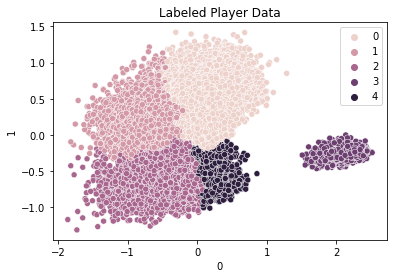

In [26]:
data_labels = clustering_model.labels_
sns.scatterplot(x=0, 
                y=1, 
                data=reduced, 
                hue=data_labels).set_title('Labeled Player Data')

In [31]:
sil_val = sklearn.metrics.silhouette_score(reduced,clustering_model.labels_,metric='euclidean', random_state=10)

In [32]:
sil_val

0.41885582938968174

In [12]:
def cal_clusters(n_clusters,linkage=None):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage)
    clustering_model.fit(reduced)
    return clustering_model.labels_

In [53]:
res =dict()
for i in {'average', 'single', 'complete', 'ward'}:
    tempdict=dict()
    for n_cluster in range(2,10):
        labels = cal_clusters(n_cluster,linkage=i)
        sil_val = sklearn.metrics.silhouette_score(reduced,labels,metric='euclidean', random_state=10)
        tempdict[n_cluster]=sil_val
    res[i] = tempdict


In [54]:
print(res)

{'ward': {2: 0.6395395456992689, 3: 0.4744032760071619, 4: 0.4666086714817483, 5: 0.41885582938968174, 6: 0.3845137243109282, 7: 0.3679780067812918, 8: 0.3494679561882452, 9: 0.3513095398717491}, 'single': {2: 0.6395395456992689, 3: 0.47668649228945476, 4: 0.3281929965859104, 5: 0.2636289952248056, 6: 0.2626176785673255, 7: 0.2424122150651187, 8: 0.20691908741249862, 9: 0.20117814007187898}, 'average': {2: 0.6395395456992689, 3: 0.4657750935903673, 4: 0.40313258531492213, 5: 0.4195184141519376, 6: 0.3993860614372815, 7: 0.3686775004991619, 8: 0.3237743781363638, 9: 0.31949213871253274}, 'complete': {2: 0.3259316228850567, 3: 0.44605534684573445, 4: 0.4480004483532464, 5: 0.4126288415649635, 6: 0.38182237389140605, 7: 0.37258816449890503, 8: 0.38109540881898746, 9: 0.36546024911697167}}


In [55]:
res['ward']

{2: 0.6395395456992689,
 3: 0.4744032760071619,
 4: 0.4666086714817483,
 5: 0.41885582938968174,
 6: 0.3845137243109282,
 7: 0.3679780067812918,
 8: 0.3494679561882452,
 9: 0.3513095398717491}

In [56]:
res['complete']

{2: 0.3259316228850567,
 3: 0.44605534684573445,
 4: 0.4480004483532464,
 5: 0.4126288415649635,
 6: 0.38182237389140605,
 7: 0.37258816449890503,
 8: 0.38109540881898746,
 9: 0.36546024911697167}

In [1]:
# only complete and ward linkage gives good result for 3 and 4 clusters

In [3]:
# hierarchical clustering on salary and their value in the market

In [41]:
df = pd.read_csv('fifa_modified1.csv')
df.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,10.0,2021.0,12.114565,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,13.0,2023.0,1.000000,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [42]:
x = df.loc[:,['value_eur','wage_eur']].values

In [43]:
scaler = preprocessing.MinMaxScaler()    
x_scaled = scaler.fit_transform(x)
X_norm= pd.DataFrame(x_scaled)

In [14]:
def cal_clusters(n_clusters,linkage=None):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage)
    clustering_model.fit(X_norm)
    return clustering_model.labels_

In [15]:
res =dict()
for i in {'average', 'single', 'complete', 'ward'}:
    tempdict=dict()
    for n_cluster in range(2,10):
        labels = cal_clusters(n_cluster,linkage=i)
        sil_val = sklearn.metrics.silhouette_score(X_norm,labels,metric='euclidean', random_state=10)
        tempdict[n_cluster]=sil_val
    res[i] = tempdict

In [16]:
res

{'single': {2: 0.9567222404079954,
  3: 0.95701436544858,
  4: 0.9547658377835923,
  5: 0.9547384252248903,
  6: 0.9473928457198941,
  7: 0.9465405508963989,
  8: 0.9354052474749706,
  9: 0.9354676744189367},
 'ward': {2: 0.9041291698580987,
  3: 0.7790056068691434,
  4: 0.7800627031565982,
  5: 0.6558119358780449,
  6: 0.661322907704806,
  7: 0.6613767282167009,
  8: 0.6615905294717905,
  9: 0.6620690465638462},
 'average': {2: 0.9596636031790178,
  3: 0.9256334092576262,
  4: 0.9253658033181582,
  5: 0.9139038363413452,
  6: 0.9139058197665939,
  7: 0.8563768752494738,
  8: 0.8562433237542006,
  9: 0.8553965575111778},
 'complete': {2: 0.932843279932634,
  3: 0.9306115554800054,
  4: 0.9246895519459004,
  5: 0.9195128418381179,
  6: 0.8783011144564308,
  7: 0.8782711941603304,
  8: 0.8701662943394856,
  9: 0.8701218550765657}}

In [17]:
res =dict()
for i in {'average', 'single', 'complete', 'ward'}:
    tempdict=dict()
    for n_cluster in range(2,30):
        labels = cal_clusters(n_cluster,linkage=i)
        sil_val = sklearn.metrics.silhouette_score(X_norm,labels,metric='euclidean', random_state=10)
        tempdict[n_cluster]=sil_val
    res[i] = tempdict

In [18]:
res

{'single': {2: 0.9567222404079954,
  3: 0.95701436544858,
  4: 0.9547658377835923,
  5: 0.9547384252248903,
  6: 0.9473928457198941,
  7: 0.9465405508963989,
  8: 0.9354052474749706,
  9: 0.9354676744189367,
  10: 0.9351715376478843,
  11: 0.9279258759993664,
  12: 0.9277568371071001,
  13: 0.928312090000176,
  14: 0.9195795569916414,
  15: 0.9195837017179936,
  16: 0.919531785583076,
  17: 0.9195237430800444,
  18: 0.9194885685756303,
  19: 0.9193480178940358,
  20: 0.9196702793302765,
  21: 0.919648813558337,
  22: 0.8949296828532626,
  23: 0.8952904995332279,
  24: 0.8939393494246369,
  25: 0.893897094298241,
  26: 0.8938920333992066,
  27: 0.8767084287148783,
  28: 0.8768363883611318,
  29: 0.8776135118979967},
 'ward': {2: 0.9041291698580987,
  3: 0.7790056068691434,
  4: 0.7800627031565982,
  5: 0.6558119358780449,
  6: 0.661322907704806,
  7: 0.6613767282167009,
  8: 0.6615905294717905,
  9: 0.6620690465638462,
  10: 0.6635358687858979,
  11: 0.6637254626514754,
  12: 0.52950582

In [19]:
res['single']

{2: 0.9567222404079954,
 3: 0.95701436544858,
 4: 0.9547658377835923,
 5: 0.9547384252248903,
 6: 0.9473928457198941,
 7: 0.9465405508963989,
 8: 0.9354052474749706,
 9: 0.9354676744189367,
 10: 0.9351715376478843,
 11: 0.9279258759993664,
 12: 0.9277568371071001,
 13: 0.928312090000176,
 14: 0.9195795569916414,
 15: 0.9195837017179936,
 16: 0.919531785583076,
 17: 0.9195237430800444,
 18: 0.9194885685756303,
 19: 0.9193480178940358,
 20: 0.9196702793302765,
 21: 0.919648813558337,
 22: 0.8949296828532626,
 23: 0.8952904995332279,
 24: 0.8939393494246369,
 25: 0.893897094298241,
 26: 0.8938920333992066,
 27: 0.8767084287148783,
 28: 0.8768363883611318,
 29: 0.8776135118979967}

In [21]:
X_norm.head()

,0,1
0,0.905213,1.000000
1,0.554502,0.716814
2,1.000000,0.513274
3,0.734597,0.221239
4,0.853081,0.831858


In [26]:
# 3 is the clear classification
def visualize(n_clusters):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='single')
    clustering_model.fit(X_norm)
    labels = clustering_model.labels_
    plt.scatter(X_norm.loc[:, 0], X_norm.loc[:, 1], c=labels, s=40, cmap='viridis')

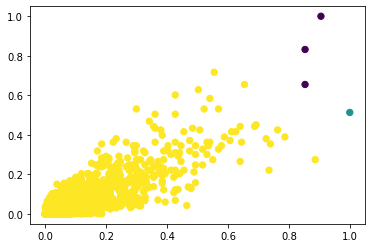

In [27]:
# 3 is the clear classification
visualize(3)

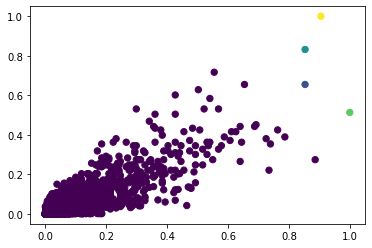

In [28]:
visualize(5)

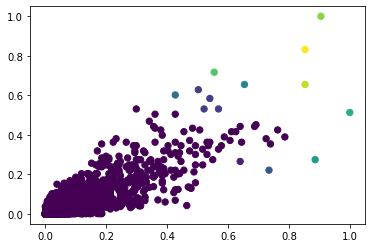

In [29]:
visualize(12)

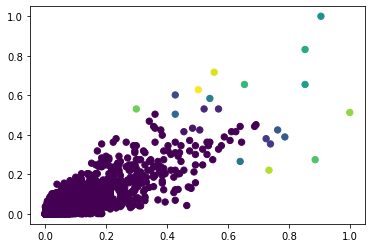

In [30]:
visualize(19)

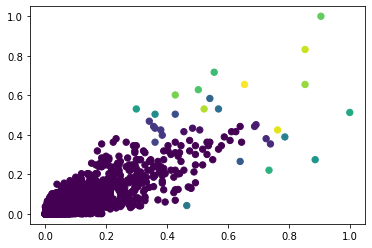

In [31]:
visualize(26)

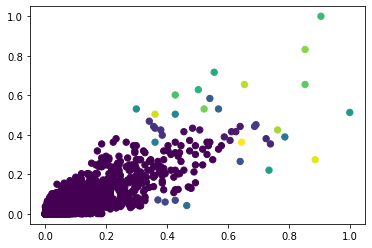

In [32]:
visualize(29)

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
y_pred = DBSCAN(eps=0.3, min_samples=50).fit_predict(X_norm)

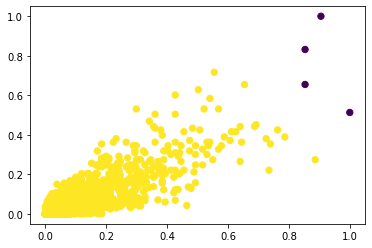

In [35]:
plt.scatter(X_norm.loc[:, 0], X_norm.loc[:, 1], c=y_pred, s=40, cmap='viridis')

In [36]:
sklearn.metrics.silhouette_score(X_norm,y_pred,metric='euclidean', random_state=10)

0.9596636031790178

0.9647686418382705

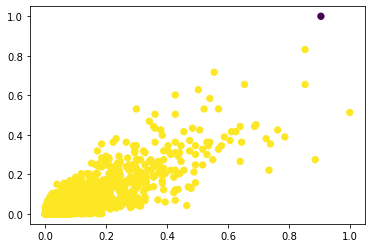

In [47]:
y_pred = DBSCAN(eps=0.3, min_samples=20).fit_predict(X_norm)
plt.scatter(X_norm.loc[:, 0], X_norm.loc[:, 1], c=y_pred, s=40, cmap='viridis')
# sklearn.metrics.silhouette_score(X_norm,y_pred,metric='euclidean', random_state=10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('fifa_modified1.csv')
names = df.short_name.tolist()
# df.drop(columns=['short_name'],inplace=True)
names
def read_normaliz_pca(scaler,n_columns=10,df=None):
    if df is None:
        df = pd.read_csv('fifa_modified1.csv')
    df.drop(columns=['sofifa_id','nationality','club','player_positions',
                         'preferred_foot','work_rate','body_type','real_face'],inplace=True)
    
    names = df.short_name.tolist()
    df.drop(columns=['short_name'],inplace=True)
    
    # Normalize(Rescale the data)
    # since some columns like wage_eur, value_eur,release_clause_eur have very high values 10000-1000000
    # whereas some columns like international_reputation,weak_foot,skill_moves have values 0-5
    # There for model can be biased towords higher values 
    # Conclusion :- it is good to normalize data to prevent model from overfitting
    x= df.values
    
    x_scaled = scaler.fit_transform(x)
    X_norm= pd.DataFrame(x_scaled)
     
    # since 60 columns means a lot to a model therfore model might not perform well and overfit
    # hence reducing number of columns to n_columns
    pca = PCA(n_components=n_columns)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))
    return reduced

In [3]:
scaler = preprocessing.MinMaxScaler()
reduced = read_normaliz_pca(scaler,n_columns=3)

In [4]:
y_pred = DBSCAN(eps=0.3, min_samples=50).fit_predict(reduced)

In [5]:
y_pred[:10]

array([-1, -1, -1,  1, -1, -1, -1,  0, -1,  0], dtype=int64)

In [6]:
reduced['cluster'] = y_pred